# Introduction
The first half runs TensorFlow's Example. In the latter half, we will write the code for Keras.

# Problem 1
Sharing and executing the official tutorial model

### NOTE
- Since it's computationally expensive, i've moved it to another notebook named problem1.ipynb in the same folder
- Relative Link: [./problem2.ipynb](./problem1.ipynb)
- Github: [Link](https://github.com/produdez/diveintocode-ml/blob/main/Week%2020/problem1.ipynb)

# Problem 2
(Advance assignment) Execute various methods

### NOTE
- Since it's computationally expensive, i've moved it to another notebook named problem2.ipynb in the same folder
- Relative Link: [./problem2.ipynb](./problem2.ipynb)
- Github: [Link](https://github.com/produdez/diveintocode-ml/blob/main/Week%2020/problem2.ipynb)

# Problem 3
Learning Iris (binary classification) with Keras

## Prep

In [1]:
# load data
from sklearn.datasets import load_iris

iris_bunch = load_iris(as_frame = True)
print('features', iris_bunch.feature_names)
print('targets', iris_bunch.target_names)

features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets ['setosa' 'versicolor' 'virginica']


In [2]:
# check features
features_data = iris_bunch.data
print(features_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# check target
target_data = iris_bunch.target
print('labels: ', target_data.unique())
print(target_data.head())

labels:  [0 1 2]
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [4]:
# binary classification filter
first_two_laybel_indexes =  target_data.lt(2)
binary_x = features_data[first_two_laybel_indexes]
binary_y = target_data[first_two_laybel_indexes]

print('Before shape: ', features_data.shape, target_data.shape)
print('After shape: ', binary_x.shape, binary_y.shape)

Before shape:  (150, 4) (150,)
After shape:  (100, 4) (100,)


In [5]:
# standardization
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
processed_bin_x = scaler.fit_transform(binary_x.to_numpy())
# print('before trans')
# print(binary_x.describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_x).describe())

# onehot encode
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
binary_y = binary_y.to_numpy().reshape(-1,1)
processed_bin_y = enc.fit_transform(binary_y).toarray()
# print('before trans')
# print(pd.DataFrame(binary_y).describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_y).describe())

In [6]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(processed_bin_x, processed_bin_y)
print([x.shape for x in [x_train, x_test, y_train,y_test]])

[(75, 4), (25, 4), (75, 2), (25, 2)]


## Model

In [7]:
import tensorflow as tf
import tensorflow.keras as keras

In [8]:
# model
model = keras.Sequential()

# layers
from tensorflow.keras import layers

model.add(layers.Dense(20, activation="relu", name="layer1"))
model.add(layers.Dense(10, activation="relu", name="layer2"))
model.add(layers.Dense(2, name="layer3"))


model.layers

In [9]:
model.build(x_train.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (75, 20)                  100       
_________________________________________________________________
layer2 (Dense)               (75, 10)                  210       
_________________________________________________________________
layer3 (Dense)               (75, 2)                   22        
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________


In [10]:
# loss
loss = 'binary_crossentropy'
# optimizer
optimizer = 'adam'
#metrics
metrics = ['accuracy']

In [11]:
model.compile(optimizer, loss, metrics = metrics)

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_data= (x_test, y_test))


Epoch 1/100
8/8 [==============================] - 1s 19ms/step - loss: 0.4179 - accuracy: 0.8133 - val_loss: 0.2200 - val_accuracy: 0.8800
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8667 - val_loss: 0.1737 - val_accuracy: 0.9600
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2412 - accuracy: 0.9467 - val_loss: 0.1340 - val_accuracy: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.9733 - val_loss: 0.1027 - val_accuracy: 1.0000
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1382 - accuracy: 0.9867 - val_loss: 0.0786 - val_accuracy: 1.0000
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.9867 - val_loss: 0.0575 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 8/100
8/8 [=========

train loss


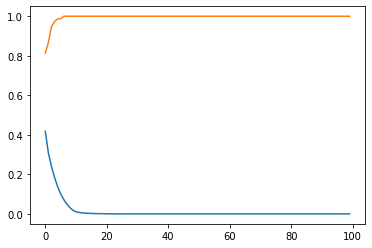

val loss


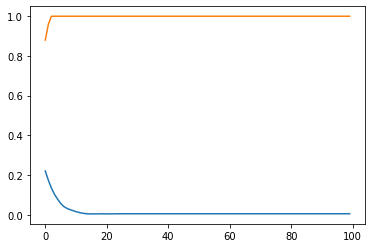

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# loss
print('train loss')
sns.lineplot(data = history.history['loss'])
sns.lineplot(data = history.history['accuracy'])

plt.show()
print('val loss')
sns.lineplot(data = history.history['val_loss'])
sns.lineplot(data = history.history['val_accuracy'])
plt.show()

# Problem 2
Learn Iris (multi-level classification) with Keras

In [14]:
# standardization
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
processed_x = scaler.fit_transform(features_data.to_numpy())
# print('before trans')
# print(binary_x.describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_x).describe())

# onehot encode
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
processed_y = enc.fit_transform(target_data.to_numpy().reshape(-1,1)).toarray()
# print('before trans')
# print(pd.DataFrame(binary_y).describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_y).describe())
# processed_y[0]

In [15]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(processed_x, processed_y)
print([x.shape for x in [x_train, x_test, y_train,y_test]])
print(x_train[0])
print(y_train[0])

[(112, 4), (38, 4), (112, 3), (38, 3)]
[1.40150837 0.32841405 0.53540856 0.26414192]
[0. 1. 0.]


In [16]:
# model
model = keras.Sequential()

# layers
from tensorflow.keras import layers

model.add(layers.Dense(20, activation="relu", name="layer1"))
model.add(layers.Dense(10, activation="relu", name="layer2"))
model.add(layers.Dense(3, name="layer3"))


model.layers

In [17]:
model.build(x_train.shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (112, 20)                 100       
_________________________________________________________________
layer2 (Dense)               (112, 10)                 210       
_________________________________________________________________
layer3 (Dense)               (112, 3)                  33        
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [18]:
# loss
loss = 'categorical_crossentropy'
# compile
model.compile(optimizer, loss, metrics = metrics)

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_data= (x_test, y_test))


Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 5.9228 - accuracy: 0.3482 - val_loss: 5.5757 - val_accuracy: 0.3158
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 7.3917 - accuracy: 0.3393 - val_loss: 6.7962 - val_accuracy: 0.3158
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 10.0912 - accuracy: 0.3393 - val_loss: 8.9074 - val_accuracy: 0.3158
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 10.9437 - accuracy: 0.3393 - val_loss: 9.7557 - val_accuracy: 0.3158
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 10.9410 - accuracy: 0.3393 - val_loss: 10.1799 - val_accuracy: 0.3158
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 11.2282 - accuracy: 0.3393 - val_loss: 10.1799 - val_accuracy: 0.3158
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 11.6597 - accuracy: 0.3393 - val_loss: 10.1799 - val_accuracy: 0.3158
Epoc

train loss


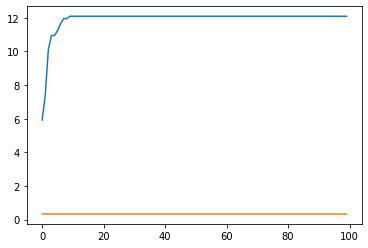

val loss


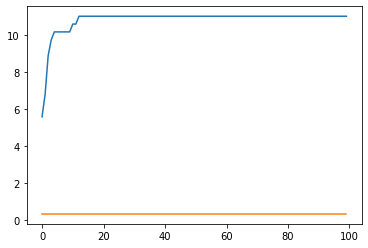

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# loss
print('train loss')
sns.lineplot(data = history.history['loss'])
sns.lineplot(data = history.history['accuracy'])

plt.show()
print('val loss')
sns.lineplot(data = history.history['val_loss'])
sns.lineplot(data = history.history['val_accuracy'])
plt.show()

# Problem 5
Learning House Prices with Keras

In [21]:
# data set
house_price_pd = pd.read_csv('../Data/Normal/houseprice_train.csv')
house_price_pd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
# selection
selected = house_price_pd[['GrLivArea', 'YearBuilt','SalePrice']]
print('selected: ', selected.shape, selected.columns)
print(selected.head())

selected:  (1460, 3) Index(['GrLivArea', 'YearBuilt', 'SalePrice'], dtype='object')
   GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000


In [23]:
# check nan
print(selected.isna().sum(axis = 0))

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


In [24]:
# normalize
print(selected.describe().transpose()[['mean', 'std']])

import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
scaled = transformer.fit_transform(selected)
print(pd.DataFrame(scaled).describe().transpose()[['mean', 'std']])

explainatory = scaled[:,:-1]
objective = scaled[:,-1].reshape(-1,1)
print(explainatory.shape, explainatory[:3])
print(objective.shape, objective[:3])

                    mean           std
GrLivArea    1515.463699    525.480383
YearBuilt    1971.267808     30.202904
SalePrice  180921.195890  79442.502883
        mean       std
0   7.268512  0.333303
1   7.586821  0.015389
2  12.024057  0.399449
(1460, 2) [[7.44483327 7.60290046]
 [7.14124512 7.58933582]
 [7.48829352 7.60190196]]
(1460, 1) [[12.24769912]
 [12.10901644]
 [12.31717117]]


In [25]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(explainatory, objective, train_size = 0.8)
print('train shape: ', [i.shape for i in [X_train, X_val, y_train, y_val]])

train shape:  [(1168, 2), (292, 2), (1168, 1), (292, 1)]


In [26]:
# linear regression model
model = keras.Sequential(
  [
    layers.Dense(1)
  ]
)

model.build(X_train.shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1168, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(
    optimizer='adam',
    loss='mean_absolute_error')

In [28]:
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_data= (X_val, y_val))


Epoch 1/100
117/117 [==============================] - 0s 2ms/step - loss: 15.6666 - val_loss: 14.7315
Epoch 2/100
117/117 [==============================] - 0s 1ms/step - loss: 13.8115 - val_loss: 12.8758
Epoch 3/100
117/117 [==============================] - 0s 1ms/step - loss: 11.9568 - val_loss: 11.0194
Epoch 4/100
117/117 [==============================] - 0s 1ms/step - loss: 10.1019 - val_loss: 9.1639
Epoch 5/100
117/117 [==============================] - 0s 914us/step - loss: 8.2470 - val_loss: 7.3082
Epoch 6/100
117/117 [==============================] - 0s 681us/step - loss: 6.3923 - val_loss: 5.4517
Epoch 7/100
117/117 [==============================] - 0s 643us/step - loss: 4.5376 - val_loss: 3.5960
Epoch 8/100
117/117 [==============================] - 0s 603us/step - loss: 2.6828 - val_loss: 1.7403
Epoch 9/100
117/117 [==============================] - 0s 910us/step - loss: 0.8736 - val_loss: 0.2089
Epoch 10/100
117/117 [==============================] - 0s 948us/step - lo

train loss


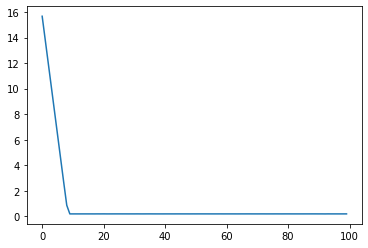

val loss


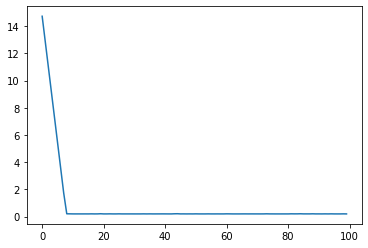

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# loss
print('train loss')
sns.lineplot(data = history.history['loss'])

plt.show()
print('val loss')
sns.lineplot(data = history.history['val_loss'])
plt.show()

# Problem 6
Learning MNIST with Keras

In [87]:
# load dataset
number_minist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = number_minist.load_data()
print('Shapes: ', train_images.shape, train_labels.shape)

Shapes:  (60000, 28, 28) (60000,)


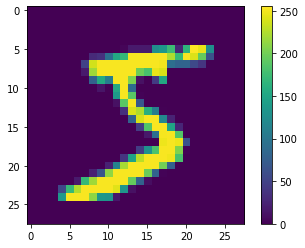

In [88]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [89]:
train_images = train_images / 255.0

test_images = test_images / 255.0

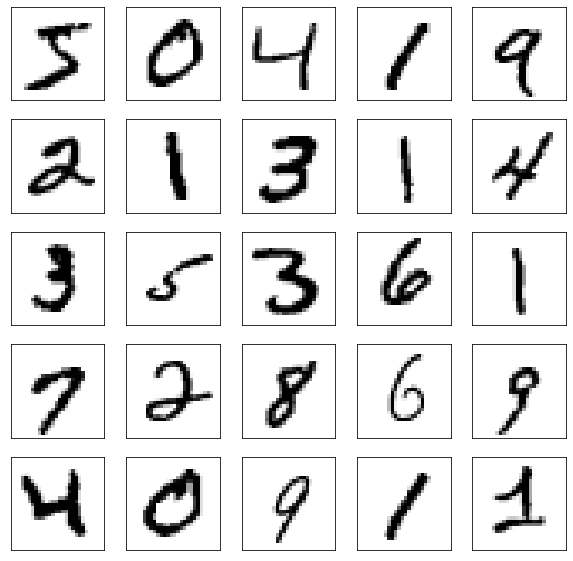

In [90]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [96]:
# Reduce train val size
from sklearn.model_selection import train_test_split
init_x_train, _, init_y_train, _ = train_test_split(train_images, train_labels)

# encode
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_train = enc.fit_transform(init_y_train.reshape(-1,1)).toarray()
print('y sample: ', y_train[0])

# Add one dimension as the channel into the dataset
x_train = tf.expand_dims(init_x_train, axis = -1).numpy()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)
print('shapes: ', [x.shape for x in [x_train, x_val, y_train, y_val]])

y sample:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
shapes:  [(33750, 28, 28, 1), (11250, 28, 28, 1), (33750, 10), (11250, 10)]


In [97]:
# a simple model
model = keras.Sequential([
  keras.layers.Conv2D(3, (3,3), activation = 'relu'),
  keras.layers.Conv2D(2, (3,3), activation = 'relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(20, activation = 'relu'),
  keras.layers.Dense(10)
])
print(model.layers)

[<keras.layers.convolutional.Conv2D object at 0x19359f6a0>, <keras.layers.convolutional.Conv2D object at 0x19359fcc0>, <keras.layers.core.Flatten object at 0x1935cc3c8>, <keras.layers.core.Dense object at 0x1935cc518>, <keras.layers.core.Dense object at 0x1935cc7f0>]


In [98]:
model.build(input_shape = x_train.shape)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (33750, 26, 26, 3)        30        
_________________________________________________________________
conv2d_19 (Conv2D)           (33750, 24, 24, 2)        56        
_________________________________________________________________
flatten_9 (Flatten)          (33750, 1152)             0         
_________________________________________________________________
dense_19 (Dense)             (33750, 20)               23060     
_________________________________________________________________
dense_20 (Dense)             (33750, 10)               210       
Total params: 23,356
Trainable params: 23,356
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
history = model.fit(
  x_train,y_train,
  validation_data = (x_val,y_val),
  epochs = 10,
  batch_size = 20,
)

Epoch 1/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3652 - accuracy: 0.8881 - val_loss: 0.2319 - val_accuracy: 0.9317
Epoch 2/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1976 - accuracy: 0.9407 - val_loss: 0.1476 - val_accuracy: 0.9561
Epoch 3/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1295 - accuracy: 0.9599 - val_loss: 0.1457 - val_accuracy: 0.9547
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0991 - accuracy: 0.9693 - val_loss: 0.1027 - val_accuracy: 0.9683
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0827 - accuracy: 0.9737 - val_loss: 0.1071 - val_accuracy: 0.9654
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0724 - accuracy: 0.9772 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0617 - accuracy: 0.9805 - val_loss: 0.0928 - val_accuracy

loss


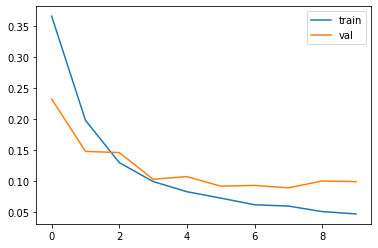

accuracy


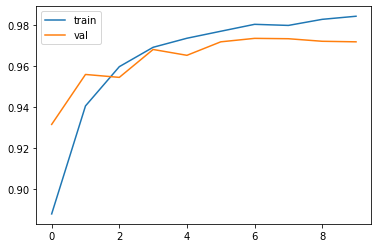

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
# loss
print('loss')
sns.lineplot(data = history.history['loss'], label = 'train')
sns.lineplot(data = history.history['val_loss'], label = 'val')
plt.show()
print('accuracy')
sns.lineplot(data = history.history['accuracy'], label = 'train')
sns.lineplot(data = history.history['val_accuracy'], label = 'val')

plt.show()

# Problem 7
Rewrite to pytorch

## NOTE:
**Let's just implement the MINIST Problem to see the difference**

In [102]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

In [119]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



102.8%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



112.7%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw




/Users/long.th/.pyenv/versions/3.6.8/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [127]:
train_size = int(0.8 * len(training_data))
test_size = len(training_data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(training_data, [train_size, test_size])

train_size = int(0.8 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

len(train_dataset)

38400

In [128]:
# Create data loaders.
batch_size = 20
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [129]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


In [134]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.convolutional = nn.Sequential(
            nn.Conv2d(1,3,(3,3)),
            nn.ReLU(),
            nn.Conv2d(3,2,(3,3)),
            nn.ReLU(),
        )
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(24*24*2, 20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.ReLU(),
        )

    def forward(self, x):
        conv = self.convolutional(x)
        flatten = self.flatten(conv)
        logits = self.linear_relu_stack(flatten)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (convolutional): Sequential(
    (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1152, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): ReLU()
  )
)


In [135]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


In [136]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [137]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.311054  [    0/38400]
loss: 2.294491  [ 2000/38400]
loss: 2.302927  [ 4000/38400]
loss: 2.316278  [ 6000/38400]
loss: 2.311922  [ 8000/38400]
loss: 2.290359  [10000/38400]
loss: 2.303864  [12000/38400]
loss: 2.333958  [14000/38400]
loss: 2.291232  [16000/38400]
loss: 2.283972  [18000/38400]
loss: 2.300795  [20000/38400]
loss: 2.304616  [22000/38400]
loss: 2.303644  [24000/38400]
loss: 2.305770  [26000/38400]
loss: 2.284513  [28000/38400]
loss: 2.275257  [30000/38400]
loss: 2.284856  [32000/38400]
loss: 2.299062  [34000/38400]
loss: 2.289065  [36000/38400]
loss: 2.277783  [38000/38400]
Test Error: 
 Accuracy: 26.4%, Avg loss: 2.287649 

Epoch 2
-------------------------------
loss: 2.302605  [    0/38400]
loss: 2.290083  [ 2000/38400]
loss: 2.284952  [ 4000/38400]
loss: 2.281401  [ 6000/38400]
loss: 2.304350  [ 8000/38400]
loss: 2.269722  [10000/38400]
loss: 2.284285  [12000/38400]
loss: 2.303769  [14000/38400]
loss: 2.273209  [16000/38400

# Problem 8
(Advance assignment) Comparison of frameworks

### Framework Comparison

| Point      | Keras | Pytorch    |
| :---        |    ----:   |          ---: |
| API Level      | Very High  | Lower level, but higher than TF   |
| Code Length   | Extreme short, unless customized | Rather lengthy |
| Flexibility   | Enough with functional api and extension | Low level -> Very flexible |
| Speed   | Decent, of course slower due to high level | As fast as TF, faster in some cases |
| Debugging  | High level and not so verbose so hard to debug | Talks a lot, nice to debug |
| Ease Of Use   | Very | Not as much, but decent |
| Popularity   | Coupled with TF, super popular | Less popular, but still one of the biggest |